In [8]:
# Install dependencies if not already installed
!pip install inference-sdk pillow matplotlib

In [43]:
# Upload an image
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()

# Load the uploaded image
for filename in uploaded:
    image = Image.open(io.BytesIO(uploaded[filename]))
    image_path = filename

Saving img 2.webp to img 2 (1).webp


In [44]:
# Call Roboflow API
from inference_sdk import InferenceHTTPClient

# Initialize the Roboflow client
CLIENT = InferenceHTTPClient(
    api_url="https://serverless.roboflow.com",
    api_key="uzZ7zUbf0zrcWJzKWvgD"
)

# Run inference on the image
result = CLIENT.infer(image_path, model_id="annotating-jeans-dataset-collected-by-ritu-ma-am/2")

In [45]:
# Draw bounding boxes for selected classes
from PIL import ImageDraw
import matplotlib.pyplot as plt

# 🎯 Classes to keep
target_classes = {"Crop Top", "Jacket", "Jeans", "Kurta", "T-Shirt", "Tank Top", "Top"}

# Create a copy to draw on
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)

# 🔲 Draw filtered class predictions
for pred in result['predictions']:
    cls = pred['class']
    if cls not in target_classes:
        continue

    x, y = pred['x'], pred['y']
    w, h = pred['width'], pred['height']
    conf = pred['confidence']

    # Convert center x,y to box corners
    left = x - w / 2
    top = y - h / 2
    right = x + w / 2
    bottom = y + h / 2

    # Draw bounding box
    draw.rectangle([left, top, right, bottom], outline="lime", width=4)

    # Draw label
    label = f"{cls} ({conf:.2f})"
    draw.text((left, top - 10), label, fill="lime")

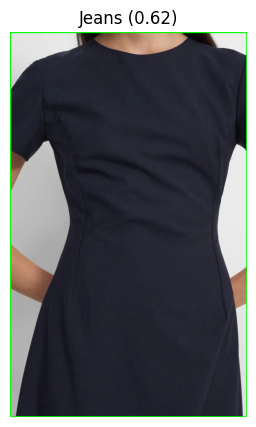

In [46]:
cropped = image_with_boxes.crop((left, top, right, bottom))

# 🖼️ Show the cropped area
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(cropped)
plt.axis('off')
plt.title(f"{pred['class']} ({pred['confidence']:.2f})")
plt.show()